In [21]:
#import data analysis packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
folder_name = 'results/tm'

jz = pd.read_excel('datasets/job_zone.xlsx').rename(
    columns=lambda x: x.lower().replace(" ", "_")
).drop(columns=['date', 'domain_source','o*net-soc_code']).rename(
    columns={'job_zone': 'zone'}
)

In [131]:
#open json file as dataframe
df = pd.read_json(folder_name + "/simmistral_prompt1_results.json", lines=True).dropna()
#merge with jz 
df = pd.merge(df, jz, how='left', on='title')
df

,title,ref_task,ind,gen_task,iteration,score,matrix,ref_order,gen_order,zone
0,Hydroelectric Production Managers,"[Direct operations, maintenance, or repair of ...",11,[Develop annual production plans for hydroelec...,0,0.501684,"[[0.5416164994, 0.31367903950000003, 0.3577922...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[3, 11, 14, 12, 1, 2, 17, 0, 5, 13, 7, 4, 6, 1...",3
1,Water Resource Specialists,"[Perform hydrologic, hydraulic, or water quali...",11,[Conduct water quality monitoring to identify ...,0,0.607968,"[[0.5628510118, 0.4258703887, 0.4388752878, 0....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[13, 5, 18, 1, 6, 10, 9, 15, 4, 16, 12, 8, 7, ...",4
2,Architectural and Engineering Managers,[Manage the coordination and overall integrati...,11,"[Develop project plans, timelines, and budget ...",0,0.514814,"[[0.5522666574, 0.7069164515, 0.5035734773, 0....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1, 3, 5, 11, 10, 9, 6, 18, 2, 8, 16, 15, 12, ...",5
3,Credit Counselors,[Calculate clients' available monthly income t...,13,[Evaluate clients' financial situations to det...,0,0.607055,"[[0.7107767463, 0.7116643786, 0.54372715950000...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 18, 3, 22, 7, 21, 11, 17, 1, 16, 12, 4, 20...",4
4,Personal Financial Advisors,[Interview clients to determine their current ...,13,[Analyze client's financial status to determin...,0,0.601199,"[[0.6688073277000001, 0.5160511136, 0.51274383...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[5, 0, 3, 15, 10, 7, 6, 1, 4, 9, 13, 2, 8, 17,...",4
...,...,...,...,...,...,...,...,...,...,...
425,"Furnace, Kiln, Oven, Drier, and Kettle Operato...","[Monitor equipment operation, gauges, and pane...",51,[Monitor temperature controls and adjust setti...,9,0.483645,"[[0.39663013820000004, 0.6810680628, 0.3344294...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1, 8, 9, 4, 15, 13, 12, 5, 2, 6, 14, 0, 3, 16...",2
426,Power Plant Operators,"[Control generator output to match the phase, ...",51,[Monitor power plant equipment to ensure prope...,9,0.493795,"[[0.3054440022, 0.31571882960000003, 0.5271522...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[10, 11, 1, 14, 0, 19, 7, 21, 15, 5, 17, 4, 18...",2
427,"Painting, Coating, and Decorating Workers","[Apply coatings, such as paint, ink, or lacque...",51,"[Apply paint, varnish, enamel, or coatings to ...",9,0.433875,"[[0.6358622313, 0.5372363925, 0.4317378402, 0....","[0, 1, 2, 3, 4, 5, 6, 7, 8]","[0, 8, 7, 2, 3, 4, 5, 6, 1]",1
428,"Laborers and Freight, Stock, and Material Move...",[Maintain equipment storage areas to ensure th...,53,[Manually load and unload freight from deliver...,9,0.489425,"[[0.220524624, 0.5192154646, 0.5897610784, 0.4...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[11, 6, 7, 2, 0, 4, 8, 1, 12, 9, 3, 5, 10]",2


In [132]:
def get_result(df):
    score_df = df.groupby("title").agg({
        "perfect_match": "mean",
        "related": "mean",
        "ind": "first"
    }).reset_index()
    #merge with jz
    score_df = score_df.merge(right=jz, left_on="title", right_on="title")
    return score_df

Text(0.5, 1.0, 'mean similarity score by title')

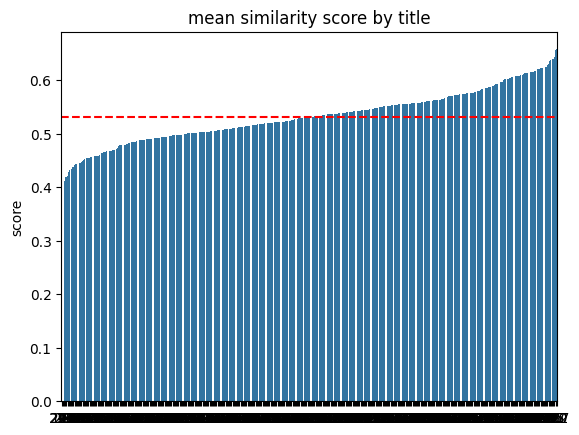

In [133]:
mean_score = df["score"]
#add a average line


#plot the series using column chat
sns.barplot(mean_score, order=mean_score.sort_values().index)
#add a average line
plt.axhline(y=mean_score.mean(), color='r', linestyle='--')

plt.title("mean similarity score by title")

Text(0.5, 1.0, 'mean similarity score by industry')

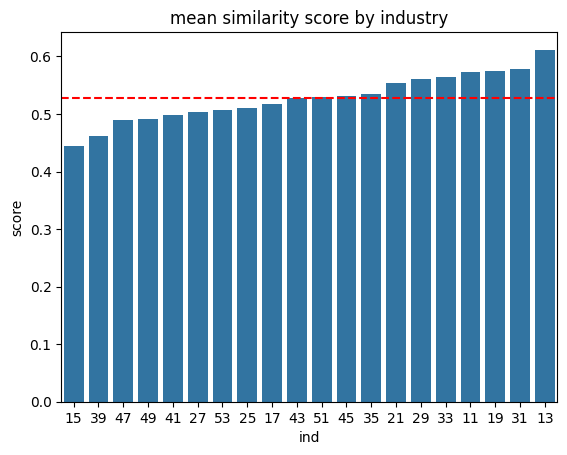

In [134]:
# get mean similarity score base on industry
mean_score = df.groupby("ind")["score"].mean()
#add a average line


#plot the series using column chat
sns.barplot(mean_score, order=mean_score.sort_values().index)
#add a average line
plt.axhline(y=mean_score.mean(), color='r', linestyle='--')

plt.title("mean similarity score by industry")

Text(0.5, 1.0, 'mean similarity score by job zone')

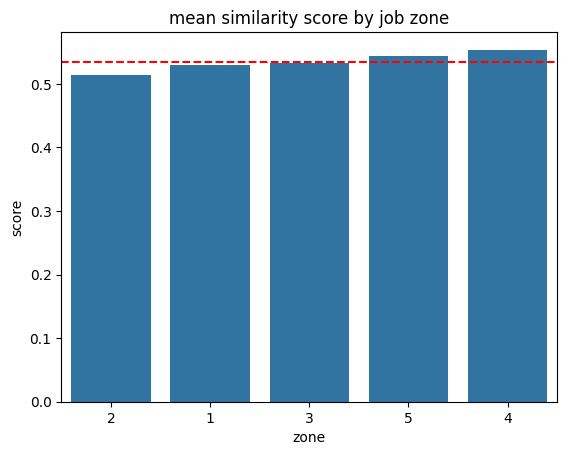

In [135]:
#plot similarity score by job zone
mean_score = df.groupby("zone")["score"].mean()
plt.axhline(y=mean_score.mean(), color='r', linestyle='--')
sns.barplot(mean_score, order=mean_score.sort_values().index)
plt.title("mean similarity score by job zone")

In [136]:
max_similarity = df[df["score"] == df["score"].max()]
max_similarity

,title,ref_task,ind,gen_task,iteration,score,matrix,ref_order,gen_order,zone
387,Hydroelectric Production Managers,"[Direct operations, maintenance, or repair of ...",11,[Develop production schedules and coordination...,9,0.657549,"[[0.5638666153, 0.6171583533, 0.6719552875, 0....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[8, 11, 16, 17, 3, 2, 6, 0, 1, 4, 7, 14, 12, 1...",3


Text(0.5, 1.0, 'similarity matrix of Hydroelectric Production Managers')

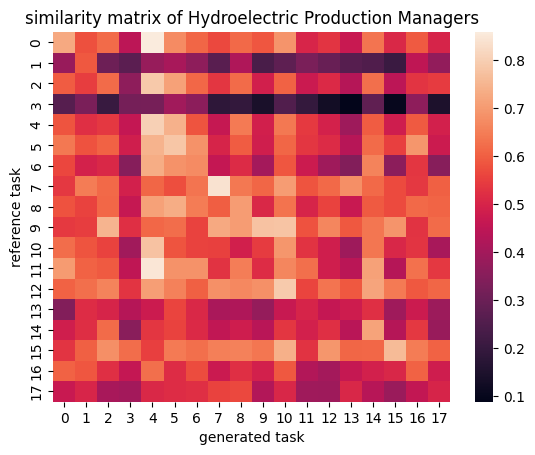

In [137]:
x = max_similarity.index.values[0]
matrix = np.array(df["matrix"][x])
order = df["gen_order"][x]

rearranged_matrix = matrix[:, order]
sns.heatmap(rearranged_matrix, cmap="rocket")
plt.xlabel("generated task")
plt.ylabel("reference task")
plt.title("similarity matrix of " + df["title"][x])

In [138]:
min_similarity = df[df["score"] == df["score"].min()]
min_similarity

,title,ref_task,ind,gen_task,iteration,score,matrix,ref_order,gen_order,zone
291,Roofers,[Inspect problem roofs to determine the best r...,47,[Install or repair roofing systems using vario...,6,0.407522,"[[0.6672743559000001, 0.5462847948, 0.61971962...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[11, 6, 19, 25, 20, 1, 4, 16, 13, 14, 8, 7, 15...",2


Text(0.5, 1.0, 'similarity matrix of Roofers')

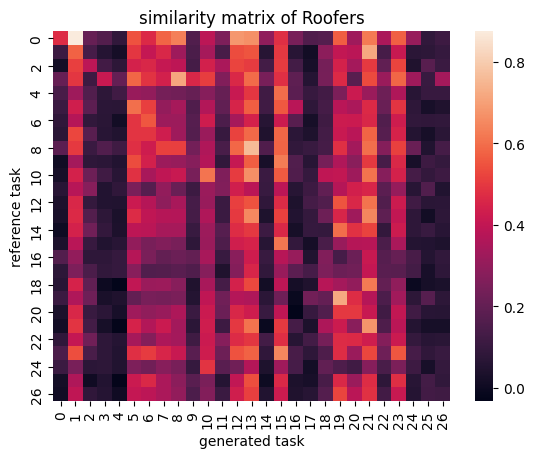

In [139]:
x = min_similarity.index.values[0]
matrix = np.array(df["matrix"][x])
order = df["gen_order"][x]

rearranged_matrix = matrix[:, order]
sns.heatmap(rearranged_matrix, cmap="rocket")
plt.xlabel("generated task")
plt.ylabel("reference task")
plt.title("similarity matrix of " + df["title"][x])

In [140]:
#create a df dropping the rows with matrix shape not equal to (x, x)
df_test = df[df["matrix"].apply(lambda x : np.shape(x)[0] == np.shape(x)[1])]
#define a function to rearrange matrix based on gen_order
def rearrange_matrix(matrix, order):
    return matrix[:, order]
#apply the function to the matrix column
df_test["rearranged_matrix"] = df_test.apply(lambda x : rearrange_matrix(np.array(x["matrix"]), x["gen_order"]), axis=1)



In [114]:
# find the best rearranged matrix
def is_diagonally_dominant(rearranged_matrix):
    D = np.abs(np.diag(rearranged_matrix))
    S = np.sum(np.abs(rearranged_matrix), axis=1) - D
    return np.all(D >= S)

def calculate_score(rearranged_matrix):
    score = 0
    for i in range(np.shape(rearranged_matrix)[0]):
        max_off_diagonal = max(abs(rearranged_matrix[i][j]) for j in range(np.shape(rearranged_matrix)[1]) if j != i)
        score += abs(rearranged_matrix[i][i]) - max_off_diagonal
    return score

def find_best_rearranged_matrix(df):
    best_score = -float('inf')
    best_index = None
    for index, row in df.iterrows():
        rearranged_matrix = row['rearranged_matrix']
        if is_diagonally_dominant(rearranged_matrix):
            score = calculate_score(rearranged_matrix)
            if score > best_score:
                best_score = score
                best_index = index
    if best_index is not None:
        return best_index, best_score
    else:
        # If no diagonally dominant rearranged_matrix found, consider all with highest score
        for index, row in df.iterrows():
            rearranged_matrix = row['rearranged_matrix']
            score = calculate_score(rearranged_matrix)
            if score > best_score:
                best_score = score
                best_index = index
        return best_index, best_score

In [115]:
# Example usage
index, score = find_best_rearranged_matrix(df_test)
if index is not None:
    print(f"The best rearranged_matrix is at index {index} with score {score}")
else:
    print("No suitable rearranged_matrix found.")

The best rearranged_matrix is at index 13 with score 3.636148795499999


In [116]:
# get the row with the best rearranged matrix
print(df_test.loc[index]["ref_task"])
print(df_test.loc[index]["gen_task"])
print(df_test.loc[index]["score"])


['Prepare course materials, such as syllabi, homework assignments, and handouts.', 'Prepare and deliver lectures to undergraduate or graduate students on topics, such as forest resource policy, forest pathology, and mapping.', "Evaluate and grade students' class work, assignments, and papers.", "Supervise students' laboratory or field work.", 'Maintain student attendance records, grades, and other required records.', 'Keep abreast of developments in the field by reading current literature, talking with colleagues, and participating in professional conferences.', 'Supervise undergraduate or graduate teaching, internship, and research work.', 'Collaborate with colleagues to address teaching and research issues.', 'Compile, administer, and grade examinations, or assign this work to others.', 'Initiate, facilitate, and moderate classroom discussions.', 'Plan, evaluate, and revise curricula, course content, and course materials and methods of instruction.', 'Advise students on academic and 

Text(0.5, 1.0, 'similarity matrix of Forestry and Conservation Science Teachers, Postsecondary')

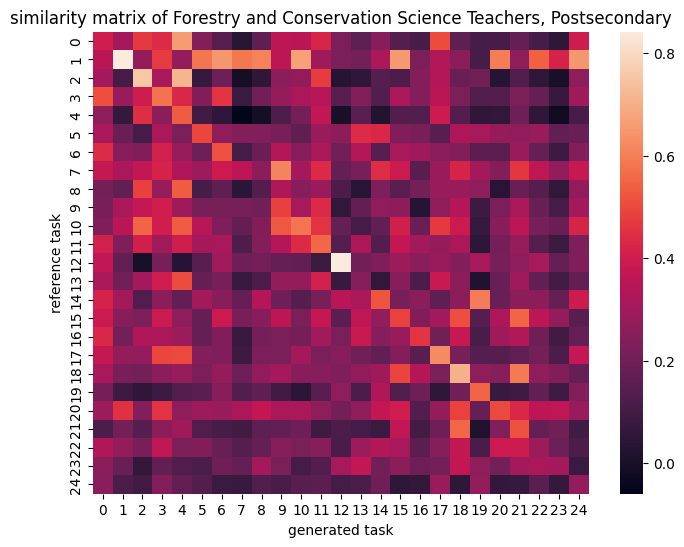

In [146]:
x = index
matrix = np.array(df["matrix"][x])
order = df["gen_order"][x]

rearranged_matrix = matrix[:, order]
plt.figure(figsize=(8, 6))
sns.heatmap(rearranged_matrix, cmap="rocket")
plt.xlabel("generated task")
plt.ylabel("reference task")
plt.title("similarity matrix of " + df["title"][x])

In [ ]:
df_test = df[df["matrix"].apply(lambda x : np.shape(x)[0] == np.shape(x)[1])]
df_test = calculate_similarity(df_test)
df_test

,title,ref_task,ind,gen_task,iteration,score,matrix,ref_order,gen_order,code,zone,rearranged_matrix,diagonal_similarity,off_diagonal_similarity,difference
0,Lodging Managers,[Answer inquiries pertaining to hotel policies...,11,[1. Coordinate front-office activities of hote...,0,0.550051,"[[0.713228941, 0.5630971193000001, 0.590073347...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[9, 11, 13, 17, 5, 3, 8, 23, 0, 1, 6, 16, 18, ...",11-9081.00,4,"[[0.7508575916, 0.5942677855, 0.54789072280000...",0.550051,0.330226,0.219825
1,Spa Managers,"[Respond to customer inquiries or complaints.,...",11,[Develop and implement marketing strategies to...,0,0.531516,"[[0.3492152095, 0.22914139930000002, 0.2940952...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[5, 3, 20, 6, 7, 11, 9, 0, 19, 18, 1, 10, 16, ...",11-9179.02,3,"[[0.6021389961, 0.2011715323, 0.3788129389, 0....",0.531516,0.284702,0.246814
2,Training and Development Managers,[Analyze training needs to develop new trainin...,11,[Designing training programs to improve employ...,0,0.648870,"[[0.7067481279000001, 0.8326070309, 0.71625906...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[1, 4, 0, 8, 7, 11, 6, 3, 2, 10, 9, 5]",11-3131.00,4,"[[0.8326070309, 0.6868743896, 0.70674812790000...",0.648870,0.473658,0.175212
3,Customs Brokers,[Prepare and process import and export documen...,13,[Prepare and submit customs entry documents to...,0,0.580330,"[[0.7682016492, 0.5910642147, 0.518204391, 0.8...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[3, 11, 12, 2, 5, 1, 13, 18, 8, 22, 20, 7, 16,...",13-1041.08,3,"[[0.8145998716, 0.6097154021, 0.33242908120000...",0.580330,0.355638,0.224692
4,Government Property Inspectors and Investigators,"[Prepare correspondence, reports of inspection...",13,[Inspect government-owned property to ensure c...,0,0.507692,"[[0.5265690088, 0.444504559, 0.4854095578, 0.2...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[4, 2, 7, 1, 0, 8, 12, 9, 10, 5, 11, 6, 3]",13-1041.04,3,"[[0.5593031645000001, 0.4854095578, 0.43245270...",0.507692,0.342465,0.165227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,Power Plant Operators,"[Control generator output to match the phase, ...",51,[Monitor and inspect power plant equipment and...,9,0.555895,"[[0.2404494137, 0.723092854, 0.3624368906, 0.0...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1, 3, 12, 2, 0, 15, 13, 7, 18, 19, 4, 8, 6, 1...",51-8013.00,2,"[[0.723092854, 0.094090119, 0.4549439251000000...",0.555895,0.319041,0.236854
426,Nuclear Power Reactor Operators,[Operate nuclear power reactors in accordance ...,51,"[1. Adjust controls to regulate reactor power,...",9,0.582722,"[[0.4352696836, 0.5130941868000001, 0.58313900...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[8, 0, 10, 3, 14, 2, 12, 1, 16, 17, 5, 18, 4, ...",51-8011.00,3,"[[0.6274795532, 0.4352696836, 0.3303284943, 0....",0.582722,0.357246,0.225476
427,Metal-Refining Furnace Operators and Tenders,"[Regulate supplies of fuel and air, or control...",51,"[Monitor the temperature, pressure, and chemic...",9,0.569541,"[[0.5264048576, 0.648655057, 0.374000400300000...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[9, 4, 0, 5, 2, 1, 10, 7, 3, 6, 11, 8, 12, 14,...",51-4051.00,2,"[[0.6547672749, 0.1969602704, 0.5264048576, 0....",0.569541,0.372224,0.197317
428,Ship Engineers,"[Monitor engine, machinery, or equipment indic...",53,[Perform routine maintenance and repairs on sh...,9,0.557782,"[[0.6980013847000001, 0.4350373745, 0.73759573...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[3, 1, 12, 2, 10, 16, 0, 8, 15, 4, 13, 11, 6, ...",53-5031.00,3,"[[0.7379598022, 0.4350373745, 0.398155421, 0.7...",0.557782,0.348100,0.209683


In [ ]:
df_test[df_test["diagonal_similarity"] == df_test["diagonal_similarity"].max()]

,title,ref_task,ind,gen_task,iteration,score,matrix,ref_order,gen_order,code,zone,rearranged_matrix,diagonal_similarity,off_diagonal_similarity,difference
230,"Business Teachers, Postsecondary",[Prepare and deliver lectures to undergraduate...,25,[advise students on academic and vocational cu...,5,0.797485,"[[0.3582337499, 0.3667060435, 0.295165658, 0.3...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[16, 7, 8, 17, 9, 15, 10, 3, 2, 11, 1, 0, 23, ...",25-1011.00,5,"[[0.9245157838, 0.2723463178, 0.3463859856, 0....",0.797485,0.276848,0.520637


In [34]:
max_difference = df_test[df_test["difference"] == df_test["difference"].max()]
max_difference

NameError: name 'df_test' is not defined

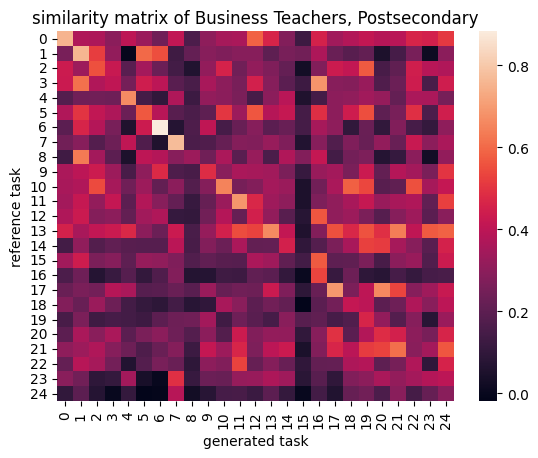

In [ ]:
x = max_difference.index.values[0]
matrix = np.array(df["matrix"][x])
order = df["gen_order"][x]

rearranged_matrix = matrix[:, order]
sns.heatmap(rearranged_matrix, cmap="rocket")
plt.xlabel("generated task")
plt.ylabel("reference task")
plt.title("similarity matrix of " + df["title"][x])
#save the plot under the folder name results
plt.savefig("results/similarity_matrix"+ df["title"][x] + ".png")

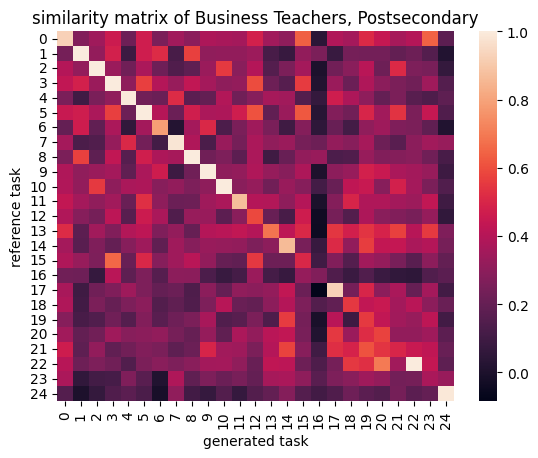

In [ ]:
x = index
matrix = np.array(df["matrix"][x])
order = df["gen_order"][x]

rearranged_matrix = matrix[:, order]
sns.heatmap(rearranged_matrix, cmap="rocket")
plt.xlabel("generated task")
plt.ylabel("reference task")
plt.title("similarity matrix of " + df["title"][x])
#save the plot under the folder name results
plt.savefig("results/similarity_matrix"+ df["title"][x] + ".png")

In [ ]:
mean = df["score"].mean()
np.save(folder_name + "/score.npy", mean)

<function matplotlib.pyplot.show(close=None, block=None)>

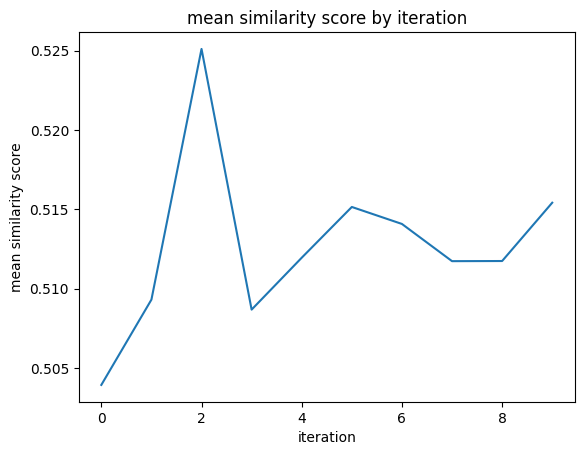

In [ ]:
# Group the df by iteration and calculate the mean score of the score column
df_grouped = df.groupby("iteration")["score"].mean()
#plot the series using column chat
sns.lineplot(df_grouped)
plt.title("mean similarity score by iteration")
plt.xlabel("iteration")
plt.ylabel("mean similarity score")
plt.show


In [1]:
# load all the json files in the folder
import os
import json
import re
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# rearrange the matrix based on the best gen_order
def rearrange_matrix(matrix, order):
    return matrix[:, order]
#for a rearranged matrix, calculate two things. 1 is the mean similarity of the diagonal, and 2 the mean similarity of the off-diagonal
def calculate_diagonal_similarity(rearranged_matrix):
    return np.mean(np.diag(rearranged_matrix))

def calculate_off_diagonal_similarity(rearranged_matrix):
    off_diagonal = np.abs(rearranged_matrix) - np.diag(np.abs(np.diag(rearranged_matrix)))
    return np.mean(off_diagonal)

#package to a function for later use
def calculate_similarity(df):
    #create a df dropping the rows with matrix shape not equal to (x, x)
    df = df[df["matrix"].apply(lambda x : np.shape(x)[0] == np.shape(x)[1])]
    #define a function to rearrange matrix based on gen_order
    df = df.copy()
    df.loc[:, "rearranged_matrix"] = df.apply(lambda x : rearrange_matrix(np.array(x["matrix"]), x["gen_order"]), axis=1)
    #apply the functions to new column diagonal_similarity and off_diagonal_similarity
    df = df.copy()
    df.loc[:, "diagonal_similarity"] = df["rearranged_matrix"].apply(calculate_diagonal_similarity)
    df = df.copy()
    df.loc[:, "off_diagonal_similarity"] = df["rearranged_matrix"].apply(calculate_off_diagonal_similarity)
    # add a column to the df that is the difference between the two
    df["difference"] = df["diagonal_similarity"] - df["off_diagonal_similarity"]
    return df

def join_iteration(df):
    df = df.groupby(["title", "ind"], group_keys=False).apply(lambda x: pd.Series({
        "score": np.array(x["score"]),
        "diagonal_similarity": np.array(x["diagonal_similarity"]),
        "off_diagonal_similarity": np.array(x["off_diagonal_similarity"]),
        "difference": np.array(x["difference"])
    })).reset_index()
    return df

def on_off_difference_array(df):
    #get the mean difference in df, by iteration, into a np array
    return df.groupby("iteration")["difference"].mean().to_numpy()

def diagnonal_similarity(df):
    #get the mean max diagonal similarity in df, by iteration, into a np array
    return df.groupby("iteration")["diagonal_similarity"].mean().to_numpy()

def general_similarity(df):
    #get the mean max diagonal similarity in df, by iteration, into a np array
    return df.groupby("iteration")["score"].mean().to_numpy()

In [4]:
folder_name = 'results/tm'

jz = pd.read_excel('datasets/job_zone.xlsx').rename(
    columns=lambda x: x.lower().replace(" ", "_")
).drop(columns=['date', 'domain_source']).rename(
    columns={'o*net-soc_code': 'code', 'job_zone': 'zone'}
)

json_files = [f for f in os.listdir(folder_name) if f.endswith('.json')]
model_name = [json_file[3:-13] for json_file in json_files]

dia_list = []
maxd_list = []
gen_sim_list = []
# Loop through each JSON file and load it into the DataFrame
for json_file in json_files:
    df = pd.read_json(os.path.join(folder_name, json_file), lines=True).dropna()
    df = df.drop(columns=["score"], axis=1)
    #create a column for mean of matrix
    df["score"] = df["matrix"].apply(lambda x: np.mean(x))
    df = calculate_similarity(df)
    maxd = on_off_difference_array(df)
    dia = diagnonal_similarity(df)
    gen_sim = general_similarity(df)
    dia_list.append(dia)
    maxd_list.append(maxd)
    gen_sim_list.append(gen_sim)

print(dia_list)
print(maxd_list)
print(gen_sim_list)

[array([0.4746827 , 0.46592683, 0.46846595, 0.46269632, 0.46560662,
       0.46353537, 0.46001738, 0.47244922, 0.46741408, 0.44585137]), array([0.47285858, 0.45893674, 0.48272969, 0.48654935, 0.47609738,
       0.47411282, 0.4606789 , 0.47986998, 0.47549622, 0.4617269 ]), array([0.56679887, 0.55467518, 0.55084081, 0.54934211, 0.54341569,
       0.54355942, 0.55639674, 0.55918975, 0.55889413, 0.54241222]), array([0.54127144, 0.5409446 , 0.54389746, 0.54265973, 0.54385209,
       0.54259569, 0.54782436, 0.54816741, 0.53891483, 0.54095613]), array([0.5372336 , 0.53015394, 0.53643745, 0.54282926, 0.53664311,
       0.53693844, 0.53683972, 0.54312022, 0.53618983, 0.53313006]), array([0.52648429, 0.53047838, 0.5302207 , 0.53604365, 0.53144318,
       0.53347271, 0.52654102, 0.53312746, 0.54021967, 0.53009303])]
[array([0.17773697, 0.17678476, 0.17600034, 0.17179061, 0.17497207,
       0.17217363, 0.17465625, 0.17734979, 0.17892853, 0.16910576]), array([0.17330691, 0.16637651, 0.18222903, 0.1

In [9]:
x = 0
df = pd.read_json(os.path.join(folder_name, json_files[x]), lines=True).dropna()
df = df.drop(columns=["score"], axis=1)
#create a column for mean of matrix
df["score"] = df["matrix"].apply(lambda x: np.mean(x))
#drop the score column
df= calculate_similarity(df)
df = df.groupby(["title"], group_keys=False).agg({
    "ind": "first",
    "score": "mean",
    "diagonal_similarity": "mean",
    "off_diagonal_similarity": "mean",
    "difference": "mean"
}).reset_index()
df = df.merge(jz, on="title", how="left")
print(json_files[x])


simdeepseek-r1_no_prompt_results.json


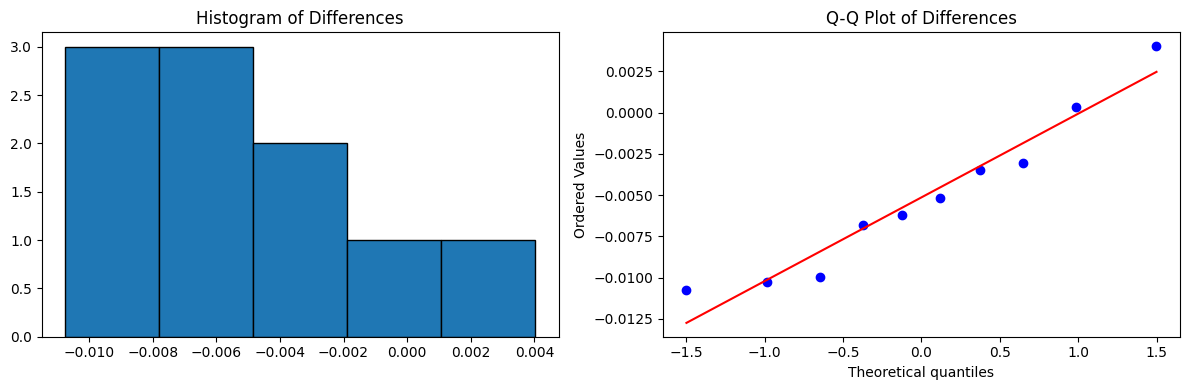

Shapiro-Wilk Statistic: 0.9366, P-value: 0.5163
Anderson-Darling Statistic: 0.2657
Critical Value at 15.0%: 0.5010, Normal
Critical Value at 10.0%: 0.5700, Normal
Critical Value at 5.0%: 0.6840, Normal
Critical Value at 2.5%: 0.7980, Normal
Critical Value at 1.0%: 0.9500, Normal


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
x = 4
# Example data
control_means = dia_list[x]
test_means = dia_list[x+1]
differences = test_means - control_means

# Histogram
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(differences, bins=5, edgecolor='black')
plt.title("Histogram of Differences")

# Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(differences, dist="norm", plot=plt)
plt.title("Q-Q Plot of Differences")
plt.tight_layout()
plt.show()

# Shapiro-Wilk Test
stat, p_value = stats.shapiro(differences)
print(f"Shapiro-Wilk Statistic: {stat:.4f}, P-value: {p_value:.4f}")

# Anderson-Darling Test
result = stats.anderson(differences)
print(f"Anderson-Darling Statistic: {result.statistic:.4f}")
for crit_val, sig_level in zip(result.critical_values, result.significance_level):
    print(f"Critical Value at {sig_level}%: {crit_val:.4f}, {'Normal' if result.statistic < crit_val else 'Not Normal'}")

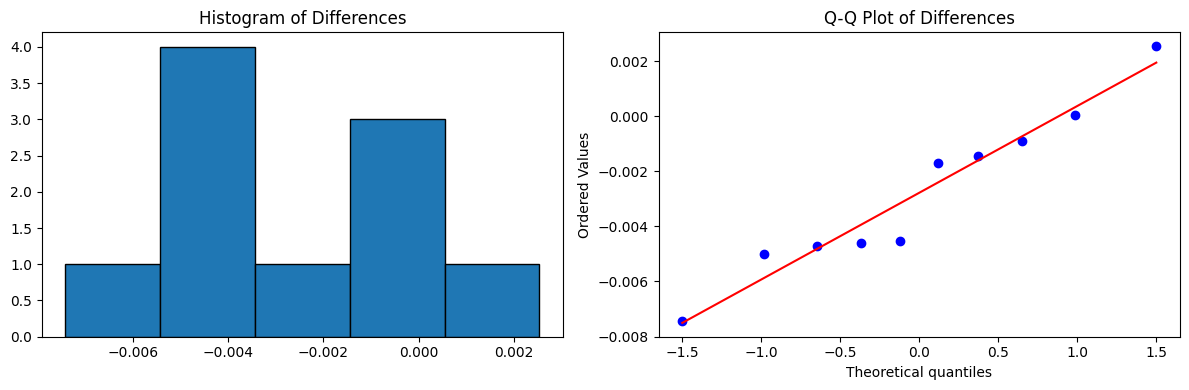

Shapiro-Wilk Statistic: 0.9530, P-value: 0.7035
Anderson-Darling Statistic: 0.3248
Critical Value at 15.0%: 0.5010, Normal
Critical Value at 10.0%: 0.5700, Normal
Critical Value at 5.0%: 0.6840, Normal
Critical Value at 2.5%: 0.7980, Normal
Critical Value at 1.0%: 0.9500, Normal


In [16]:
x = 4
# Example data
control_means = maxd_list[x]
test_means = maxd_list[x+1]
differences = test_means - control_means

# Histogram
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(differences, bins=5, edgecolor='black')
plt.title("Histogram of Differences")

# Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(differences, dist="norm", plot=plt)
plt.title("Q-Q Plot of Differences")
plt.tight_layout()
plt.show()

# Shapiro-Wilk Test
stat, p_value = stats.shapiro(differences)
print(f"Shapiro-Wilk Statistic: {stat:.4f}, P-value: {p_value:.4f}")

# Anderson-Darling Test
result = stats.anderson(differences)
print(f"Anderson-Darling Statistic: {result.statistic:.4f}")
for crit_val, sig_level in zip(result.critical_values, result.significance_level):
    print(f"Critical Value at {sig_level}%: {crit_val:.4f}, {'Normal' if result.statistic < crit_val else 'Not Normal'}")

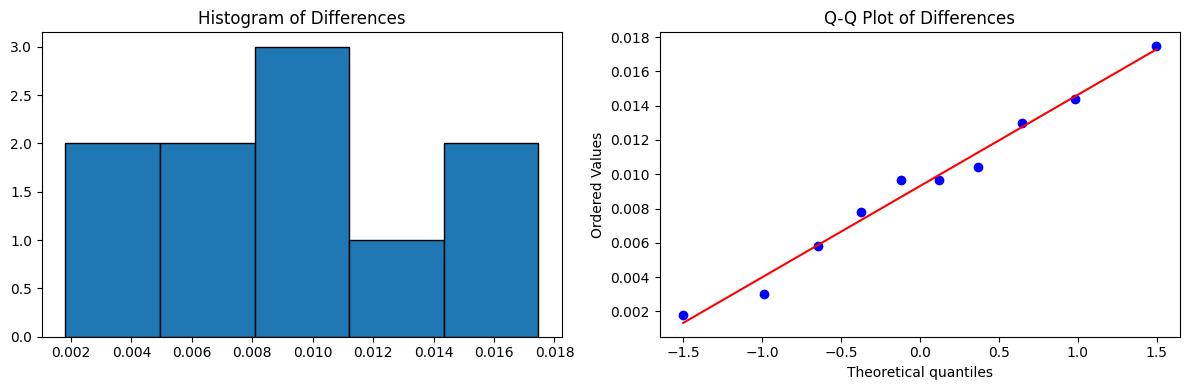

Shapiro-Wilk Statistic: 0.9767, P-value: 0.9453
Anderson-Darling Statistic: 0.1540
Critical Value at 15.0%: 0.5010, Normal
Critical Value at 10.0%: 0.5700, Normal
Critical Value at 5.0%: 0.6840, Normal
Critical Value at 2.5%: 0.7980, Normal
Critical Value at 1.0%: 0.9500, Normal


In [19]:
x = 0
# Example data
control_means = gen_sim_list[x]
test_means = gen_sim_list[x+1]
differences = test_means - control_means

# Histogram
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(differences, bins=5, edgecolor='black')
plt.title("Histogram of Differences")

# Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(differences, dist="norm", plot=plt)
plt.title("Q-Q Plot of Differences")
plt.tight_layout()
plt.show()

# Shapiro-Wilk Test
stat, p_value = stats.shapiro(differences)
print(f"Shapiro-Wilk Statistic: {stat:.4f}, P-value: {p_value:.4f}")

# Anderson-Darling Test
result = stats.anderson(differences)
print(f"Anderson-Darling Statistic: {result.statistic:.4f}")
for crit_val, sig_level in zip(result.critical_values, result.significance_level):
    print(f"Critical Value at {sig_level}%: {crit_val:.4f}, {'Normal' if result.statistic < crit_val else 'Not Normal'}")

In [14]:
import pandas as pd
from scipy.stats import ttest_ind

def perform_one_tailed_ttest(group):
    llma_scores = group[group["model"] == model_name[i]]["difference"]
    llmb_scores = group[group["model"] == model_name[i + 1]]["difference"]
    # t-test with LLMb - LLMa (test - control)
    t_stat, p_two_tailed = ttest_ind(llmb_scores, llma_scores, equal_var=False)  # Note the order
    # One-tailed p-value: LLMb > LLMa
    p_one_tailed = p_two_tailed / 2 if t_stat > 0 else 1 - (p_two_tailed / 2)
    return pd.Series({"t_stat": t_stat, "p_one_tailed": p_one_tailed})

In [15]:
i = 4
df1 = pd.read_json(os.path.join(folder_name, json_files[i]), lines=True).dropna()
df2 = pd.read_json(os.path.join(folder_name, json_files[i+1]), lines=True).dropna()
df1["model"] = model_name[i]
df2["model"] = model_name[i + 1]
combined_df = pd.concat([df1, df2], axis=0)
combined_df = combined_df.drop(columns=["score"], axis=1)
#create a column for mean of matrix
combined_df["score"] = combined_df["matrix"].apply(lambda x: np.mean(x))
combined_df = calculate_similarity(combined_df)
combined_df = pd.merge(combined_df, jz, on="title", how="left")
results = combined_df.groupby("title").apply(perform_one_tailed_ttest).reset_index()
print(f"One-Tailed t-test Results ({model_name[i + 1]} > {model_name[i]}):")
results.sort_values(by="p_one_tailed", ascending=True)[["title", "p_one_tailed"]]
# results[results["p_one_tailed"] < 0.05].sort_values(by="p_one_tailed", ascending=True)[["iteration", "p_one_tailed"]]

One-Tailed t-test Results (mistral_prompt1 > mistral_no_prompt):


C:\Users\godfr\AppData\Local\Temp\ipykernel_18436\1016049266.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = combined_df.groupby("title").apply(perform_one_tailed_ttest).reset_index()


,title,p_one_tailed
15,Exercise Physiologists,0.008561
41,Tile and Stone Setters,0.046148
10,Correspondence Clerks,0.054260
21,Gambling Cage Workers,0.063789
30,Patient Representatives,0.083046
35,Registered Nurses,0.111682
20,"Furnace, Kiln, Oven, Drier, and Kettle Operato...",0.120230
22,"Helpers--Pipelayers, Plumbers, Pipefitters, an...",0.126402
18,Fishing and Hunting Workers,0.273266
2,"Area, Ethnic, and Cultural Studies Teachers, P...",0.297641


In [16]:
i = 5
key = "zone"
print(combined_df[combined_df["model"] == model_name[i]].groupby(key).agg({
    "score": "mean",
    "diagonal_similarity": "mean",
    "difference": "mean"
}).reset_index().sort_values(by="score", ascending=False)[:][key].values.tolist())

print(combined_df[combined_df["model"] == model_name[i]].groupby(key).agg({
    "score": "mean",
    "diagonal_similarity": "mean",
    "difference": "mean"
}).reset_index().sort_values(by="diagonal_similarity", ascending=False)[:][key].values.tolist())

print(combined_df[combined_df["model"] == model_name[i]].groupby(key).agg({
    "score": "mean",
    "diagonal_similarity": "mean",
    "difference": "mean"
}).reset_index().sort_values(by="difference", ascending=False)[:][key].values.tolist())



[4, 3, 5, 2, 1]
[4, 5, 3, 1, 2]
[1, 5, 2, 4, 3]


In [17]:
key = "ind"
print(combined_df[combined_df["model"] == model_name[i]].groupby(key).agg({
    "score": "mean",
    "diagonal_similarity": "mean",
    "difference": "mean"
}).reset_index().sort_values(by="score", ascending=False)[:3][key].values.tolist())

print(combined_df[combined_df["model"] == model_name[i]].groupby(key).agg({
    "score": "mean",
    "diagonal_similarity": "mean",
    "difference": "mean"
}).reset_index().sort_values(by="diagonal_similarity", ascending=False)[:3][key].values.tolist())

print(combined_df[combined_df["model"] == model_name[i]].groupby(key).agg({
    "score": "mean",
    "diagonal_similarity": "mean",
    "difference": "mean"
}).reset_index().sort_values(by="difference", ascending=False)[:3][key].values.tolist())



[13, 19, 39]
[13, 31, 19]
[25, 45, 31]


In [18]:
consistency = combined_df.groupby(["title", "model"]).agg(
    mean_score=("diagonal_similarity", "mean"),
    std_dev=("diagonal_similarity", "std"),
    count=("diagonal_similarity", "count")
).reset_index()
consistency["cv"] = consistency["std_dev"] / consistency["mean_score"]
consistency["se"] = consistency["std_dev"] / (consistency["count"] ** 0.5)
print("\nConsistency Metrics:")
consistency.describe()


Consistency Metrics:


,mean_score,std_dev,count,cv,se
count,86.000000,86.000000,86.0,86.000000,86.000000
mean,0.534382,0.021396,10.0,0.040650,0.006766
std,0.043938,0.008120,0.0,0.016535,0.002568
min,0.444980,0.008111,10.0,0.015151,0.002565
25%,0.504065,0.016047,10.0,0.028365,0.005075
50%,0.530187,0.020937,10.0,0.039003,0.006621
75%,0.563644,0.026140,10.0,0.048733,0.008266
max,0.631179,0.054878,10.0,0.095263,0.017354


Descriptive Statistics:
deepseek-r1_no_prompt: Mean = 0.1749, Variance = 0.0000
deepseek-r1_prompt1: Mean = 0.1746, Variance = 0.0000
llama3.3_no_prompt: Mean = 0.2156, Variance = 0.0000
llama3.3_prompt1: Mean = 0.2122, Variance = 0.0000
mistral_no_prompt: Mean = 0.2051, Variance = 0.0000
mistral_prompt1: Mean = 0.2023, Variance = 0.0000

Levene's Test for Equal Variances: p-value = 0.3699

ANOVA Results:
F-statistic: 270.9706
p-value: 0.0000
Result: Reject the null hypothesis. There is a significant difference between the groups.


C:\Users\godfr\AppData\Local\Temp\ipykernel_18436\709449048.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels)


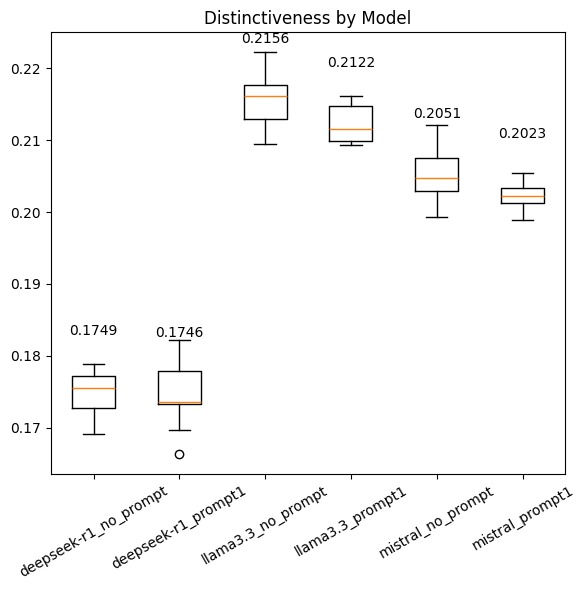

In [22]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

groups = maxd_list
labels = model_name

# Descriptive stats
print("Descriptive Statistics:")
for label, group in zip(labels, groups):
    print(f"{label}: Mean = {np.mean(group):.4f}, Variance = {np.var(group):.4f}")

# Check for equal variances (Levene's test)
levene_stat, levene_p = stats.levene(*groups)
print(f"\nLevene's Test for Equal Variances: p-value = {levene_p:.4f}")
if levene_p < 0.05:
    print("Warning: Variances may not be equal (p < 0.05). Consider a robust alternative if significant.")

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*groups)
print(f"\nANOVA Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Result: Reject the null hypothesis. There is a significant difference between the groups.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference between the groups.")

# Boxplot for visualization
plt.figure(figsize=(6, 6))
plt.boxplot(groups, labels=labels)
plt.title('Distinctiveness by Model')
plt.grid(False)
plt.xticks(rotation=30)
#annotate the mean of each group
for i, group in enumerate(groups):
    mean = np.mean(group)
    plt.annotate(f'{mean:.4f}', xy=(i + 1, mean), xytext=(i + 1, mean + 0.008),
                 fontsize=10, ha='center')
plt.tight_layout()
plt.show()

C:\Users\godfr\AppData\Local\Temp\ipykernel_18436\3016737676.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels)


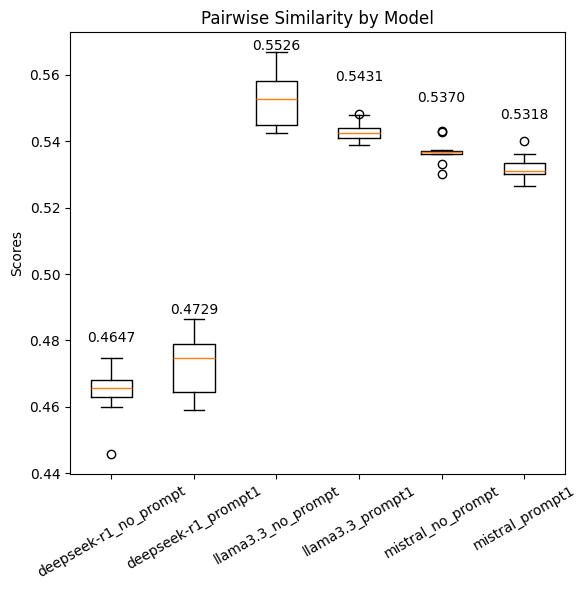

In [23]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

groups = dia_list
labels = model_name

# Boxplot for visualization
plt.figure(figsize=(6, 6))
plt.boxplot(groups, labels=labels)
plt.ylabel('Scores')
plt.title('Pairwise Similarity by Model')
# plt.grid(False)
plt.xticks(rotation=30)
#annotate the mean of each group
for i, group in enumerate(groups):
    mean = np.mean(group)
    plt.annotate(f'{mean:.4f}', xy=(i + 1, mean), xytext=(i + 1, mean + 0.015),
                 fontsize=10, ha='center')
plt.tight_layout()
plt.show()

C:\Users\godfr\AppData\Local\Temp\ipykernel_18436\224215374.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels)


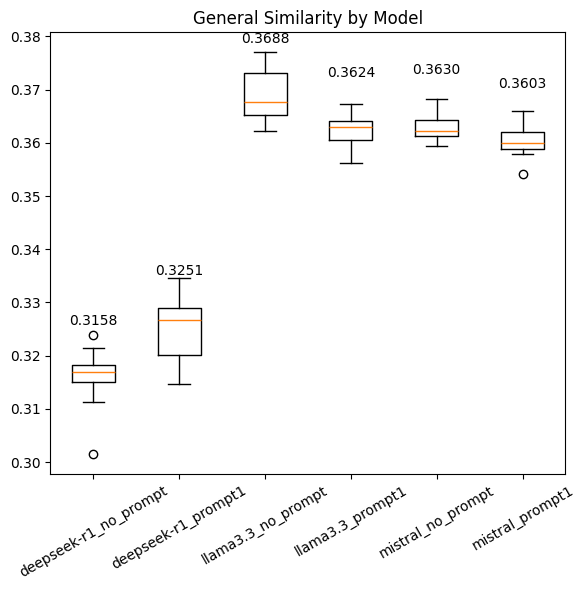

In [24]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

groups = gen_sim_list
labels = model_name

# Boxplot for visualization
plt.figure(figsize=(6, 6))
plt.boxplot(groups, labels=labels)
plt.title('General Similarity by Model')
plt.grid(False)
plt.xticks(rotation=30)
#annotate the mean of each group
for i, group in enumerate(groups):
    mean = np.mean(group)
    plt.annotate(f'{mean:.4f}', xy=(i + 1, mean), xytext=(i + 1, mean + 0.01),
                 fontsize=10, ha='center')
plt.tight_layout()
plt.show()

### considering within model only

In [28]:
import numpy as np
from scipy import stats
from statsmodels.stats.power import TTestPower

x = 0
no_prompt_model = model_name[x]
prompt_1_model = model_name[x+1]

# no_prompt = dia_list[x] 
# prompt_1 = dia_list[x+1]  

no_prompt = maxd_list[x] 
prompt_1 = maxd_list[x+1]  

# no_prompt = gen_sim_list[x] 
# prompt_1 = gen_sim_list[x+1]  

# 2 Sample t-test (H1: Prompt1 > No Prompt)
t_stat, p_value_two_tailed = stats.ttest_ind(prompt_1, no_prompt)
p_value_one_tailed = p_value_two_tailed / 2 if t_stat > 0 else 1 - (p_value_two_tailed / 2)
print(f"Two-Sample t-test ({prompt_1_model} > {no_prompt_model}):")
print(f"t-statistic: {t_stat:.4f}, p-value (one-tailed): {p_value_one_tailed:.4f}")

# Interpretation
alpha = 0.05
if p_value_one_tailed < alpha and np.mean(prompt_1) > np.mean(no_prompt):
    print("Result: Reject H₀. Prompt1 significantly improves scores.")
else:
    print("Result: Fail to reject H₀. Prompt1 does not significantly improve scores.")

# Cohen's d (for paired data)
diffs = prompt_1 - no_prompt
cohen_d = np.mean(diffs) / np.std(diffs, ddof=1)
print(f"Cohen's d: {cohen_d:.4f}")

# Power analysis (paired t-test)
power_analysis = TTestPower()
sample_size = power_analysis.solve_power(effect_size=abs(cohen_d), nobs=None, alpha=alpha, power=0.8, alternative='larger')
print(f"Required sample size (runs): {int(np.ceil(sample_size))} (for power = 0.8, alpha = 0.05)")

Two-Sample t-test (deepseek-r1_prompt1 > deepseek-r1_no_prompt):
t-statistic: -0.1773, p-value (one-tailed): 0.5694
Result: Fail to reject H₀. Prompt1 does not significantly improve scores.
Cohen's d: -0.0532
Required sample size (runs): 2188 (for power = 0.8, alpha = 0.05)
